In [9]:
## allow interaction with the plots
%matplotlib widget

%load_ext autoreload
%autoreload 2

# add the main directory reference and import 'imports.py'
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")
from imports import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from data.AQ import AQ
from models.RNN import RNN


class Config:
    def __init__(self):
        self.batch_size = 32
        self.seq_len = 48
        self.lr = 0.001
        self.hidden_size = 64
        self.layers = 2
        self.dropout = 0
        self.max_epochs = 100
        self.y_len = 1


params = Config()

data = AQ(batch_size=params.batch_size, seq_len=params.seq_len, y_len=params.y_len)
data.preview(num_samples=1)
sample = data.sample_batch()[0]

model = RNN(
    sample.shape[-1],
    params.hidden_size,
    params.layers,
    y_len=params.y_len,
    flavor="lstm",
)


Train Data Preview:
--------------------------------------------------
Constituent shapes:
batch[0]: torch.Size([32, 48, 12])
batch[1]: torch.Size([32, 1, 1])

First 1 samples:

Sample 0: 

tensor([[2.3000e+00, 1.3788e+03, 5.0333e+02, 1.0868e+03, 1.3700e+02, 9.0125e+02,
         1.2600e+02, 1.6602e+03, 1.1435e+03, 2.5150e+01, 2.4850e+01, 7.8293e-01],
        [2.2000e+00, 1.3217e+03, 5.0280e+02, 1.1287e+03, 1.4900e+02, 9.3367e+02,
         1.2800e+02, 1.6393e+03, 1.1093e+03, 2.7033e+01, 1.7833e+01, 6.2747e-01],
        [2.8000e+00, 1.4958e+03, 5.0226e+02, 1.2050e+03, 1.7200e+02, 8.2200e+02,
         1.6900e+02, 1.7665e+03, 1.3472e+03, 2.7125e+01, 2.3125e+01, 8.1801e-01],
        [2.7000e+00, 1.4088e+03, 5.0173e+02, 1.1312e+03, 1.6600e+02, 8.7300e+02,
         1.4900e+02, 1.6885e+03, 1.2058e+03, 2.5800e+01, 2.3925e+01, 7.8319e-01],
        [3.7000e+00, 1.5128e+03, 5.0119e+02, 1.3380e+03, 2.1400e+02, 7.6425e+02,
         1.5600e+02, 1.9565e+03, 1.3970e+03, 2.3050e+01, 2.6775e+01, 7.4459e

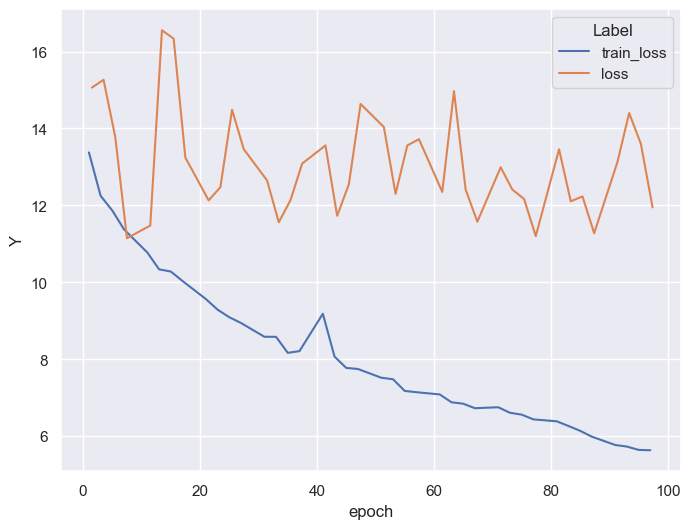

Epochs progress:   0%|          | 0/100 [00:00<?, ?Epoch/s]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

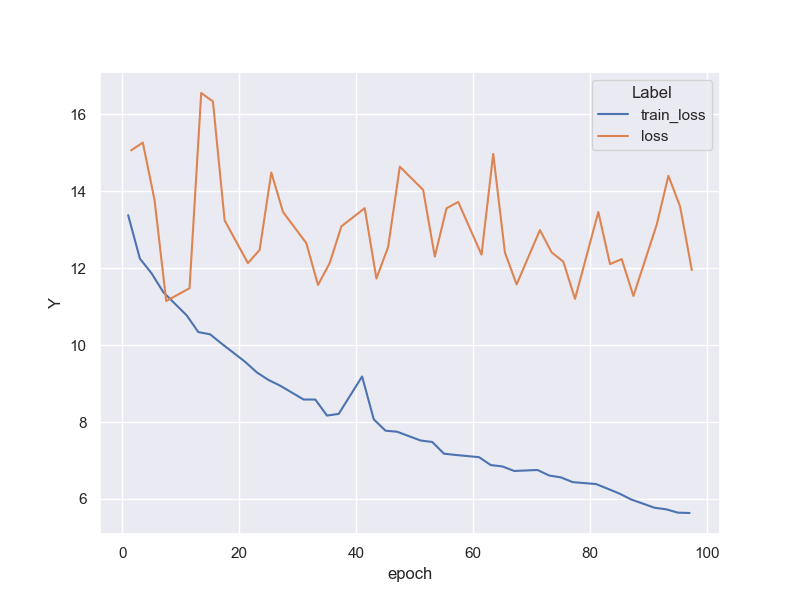

In [12]:
trainer = Trainer(model, data, max_epochs=params.max_epochs, lr=params.lr)
trainer.fit(model, data)


pl.Config.set_tbl_rows(100000)
print(trainer.board.data)

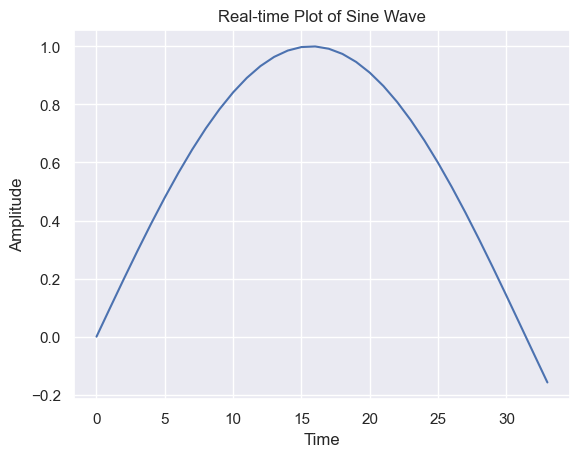

KeyboardInterrupt: 

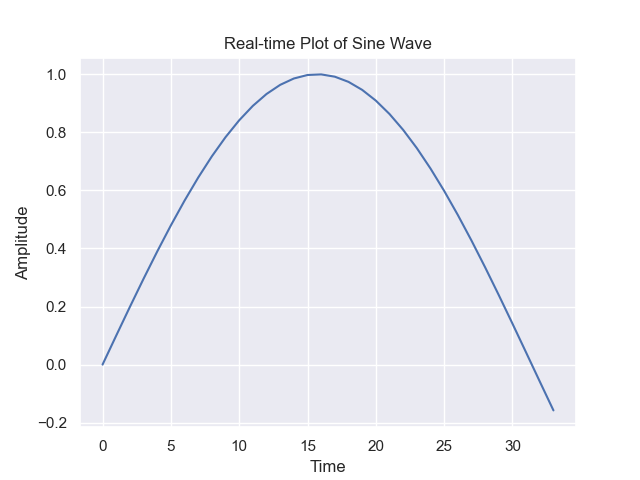